#Importing all the necessary library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Basic Exploration

In [2]:
#Loading the data
df = pd.read_csv("water_potability.csv")

In [3]:
df.sample(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
525,6.898341,187.415306,19024.485531,6.915070,NaN,428.786976,12.580162,44.380210,5.371284,0
983,7.790875,196.478712,24061.349596,6.785685,350.117254,471.518536,15.343316,44.544627,3.076214,0
2874,8.339437,175.596742,12629.853049,6.976314,NaN,452.337520,17.528839,101.851393,4.133696,0
2734,5.810742,151.876172,25419.551655,7.874166,313.364797,494.152974,14.646685,77.373813,3.436967,1
672,8.141430,211.794267,15494.359837,9.450414,NaN,363.129353,15.403390,54.490733,4.350922,1


In [4]:
#Getting the column names
columns_list = df.columns.tolist()
print("Column Names: ")
print(columns_list)

Column Names: 
['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']


In [5]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Understanding the data

Potability = 0, Unsafe Drinking Water--
Potability = 1, Safe Drinking Water

In [6]:
#df.shape determine the dimensions of a DataFrame
print("Shape of the DataFrame:",df.shape)

Shape of the DataFrame: (3276, 10)


In [7]:
print("There are", df.shape[0], "rows and", df.shape[1], "columns in the given data frame.")

There are 3276 rows and 10 columns in the given data frame.


In [8]:
#Statistical measure of the dataset
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [9]:
# Checking for duplicate rows
duplicate_rows = df[df.duplicated()]
print("Duplicate rows: ")
print(duplicate_rows)

Duplicate rows: 
Empty DataFrame
Columns: [ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity, Potability]
Index: []


# Detecting Missing Values

In [10]:
# understanding the data and its data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


As seen there exists some missing values in the dataset

In [11]:
 df.isna().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [12]:
# Calculating the percentage of missing values in each column
percentage_missing = df.isna().sum() / len(df) * 100
print("Percentage of Missing Data: ")
print(percentage_missing)

Percentage of Missing Data: 
ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64


<Axes: >

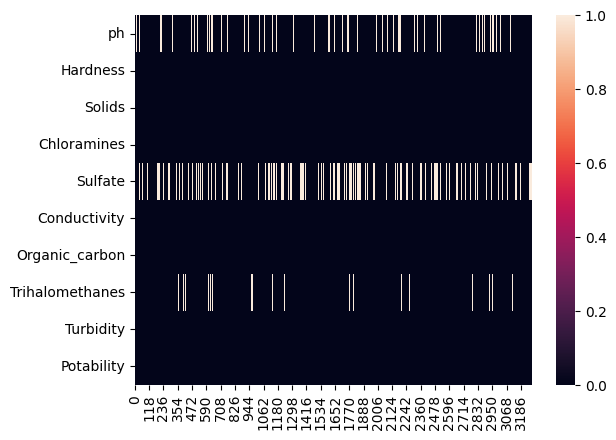

In [13]:
#Creating a heatmap to visualize the distribution of missing values across columns in the transposed df
sns.heatmap(df.isna().transpose())

# Handling missing values

On observing the heatmap presented earlier reveals that three columns conatin misssing values i.e., ph, Sulfate, Trihalomethanes.

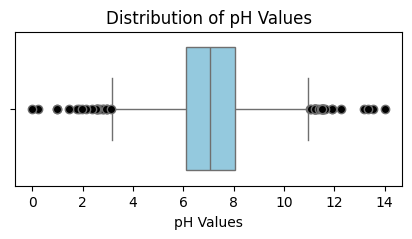

In [14]:
#Checking for outliers in ph column
plt.figure(figsize=(5,2))
sns.boxplot(x = "ph", data = df, color = "skyblue", flierprops = dict(markersize = 6, markerfacecolor = "black"))
plt.xlabel("pH Values")
plt.title("Distribution of pH Values")
plt.show()

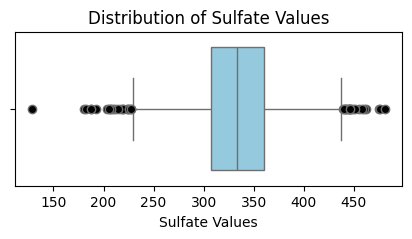

In [15]:
#Checking for outliers in sulfate column
plt.figure(figsize=(5,2))
sns.boxplot(x = "Sulfate", data = df, color = "skyblue", flierprops = dict(markersize = 6, markerfacecolor = "black"))
plt.xlabel("Sulfate Values")
plt.title("Distribution of Sulfate Values")
plt.show()

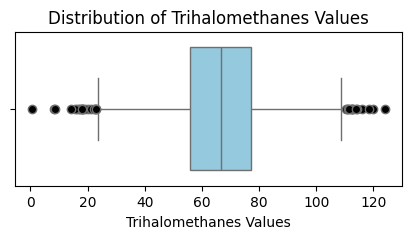

In [16]:
#Checking for outliers in Trihalomethanes column
plt.figure(figsize=(5,2))
sns.boxplot(x = "Trihalomethanes", data = df, color = "skyblue", flierprops = dict(markersize = 6, markerfacecolor = "black"))
plt.xlabel("Trihalomethanes Values")
plt.title("Distribution of Trihalomethanes Values")
plt.show()

In [17]:
#Calculating the skewness for ech column in the df
skew_values = df.skew()
print("Skewness of each column:")
print(skew_values)

Skewness of each column:
ph                 0.025630
Hardness          -0.039342
Solids             0.621634
Chloramines       -0.012098
Sulfate           -0.035947
Conductivity       0.264490
Organic_carbon     0.025533
Trihalomethanes   -0.083031
Turbidity         -0.007817
Potability         0.450784
dtype: float64


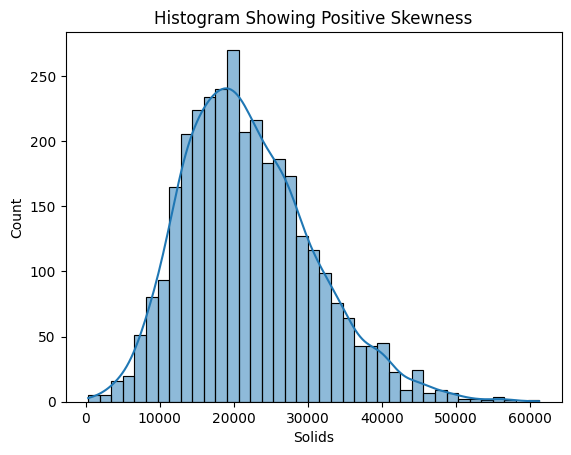

In [18]:
sns.histplot(x = "Solids", data = df, kde = True)
plt.xlabel("Solids")
plt.ylabel("Count")
plt.title("Histogram Showing Positive Skewness")
plt.show()

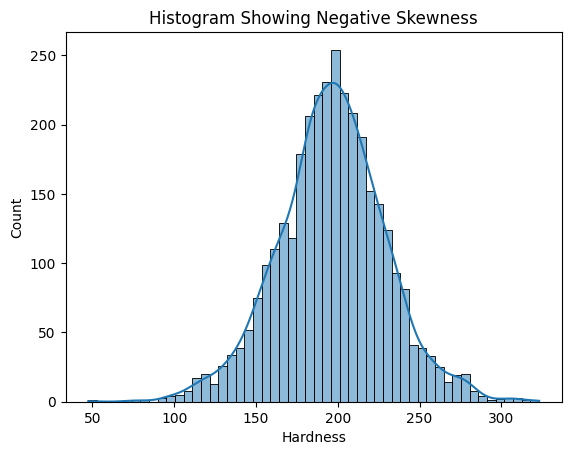

In [19]:
sns.histplot(x = "Hardness", data = df, kde = True)
plt.xlabel("Hardness")
plt.ylabel("Count")
plt.title("Histogram Showing Negative Skewness")
plt.show()

In [20]:
#Using knn imputer to fill the missing values
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df.iloc[:, :-1] = imputer.fit_transform(df.iloc[:, :-1])

In [21]:
# Checing the mising values again
df.isna().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


# Target Variable

In [22]:
# Identifying the potential target variable
potential_target = [col for col in columns_list if col not in ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
target_variable = potential_target[0]

print("Identified Target Variable:", target_variable)

Identified Target Variable: Potability


In [23]:
#Checking the distrubution of target variable
df["Potability"].value_counts()

,count
Potability,
0,1998
1,1278


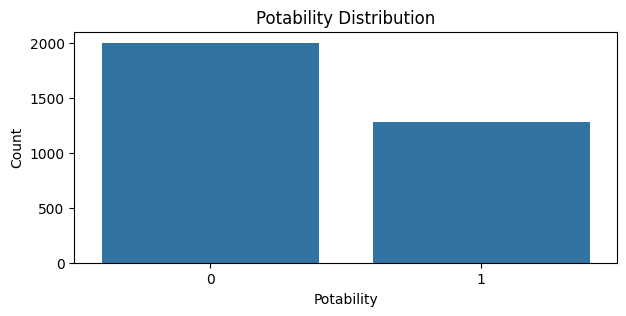

In [24]:
# Creatng count plot to visualize the distribution of "Potability" in the df
plt.figure(figsize = (7,3))
sns.countplot(x = "Potability", data = df)
plt.xlabel("Potability")
plt.ylabel("Count")
plt.title("Potability Distribution")
plt.show()

In [25]:
# Grouping the dataset by "Potability" to calculate the mean values of other columns for each class
df.groupby("Potability").mean()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0,7.081679,196.733292,21777.490788,7.092175,334.262410,426.730454,14.364335,66.317762,3.965800
1,7.072517,195.800744,22383.991018,7.169338,332.582049,425.383800,14.160893,66.540193,3.968328


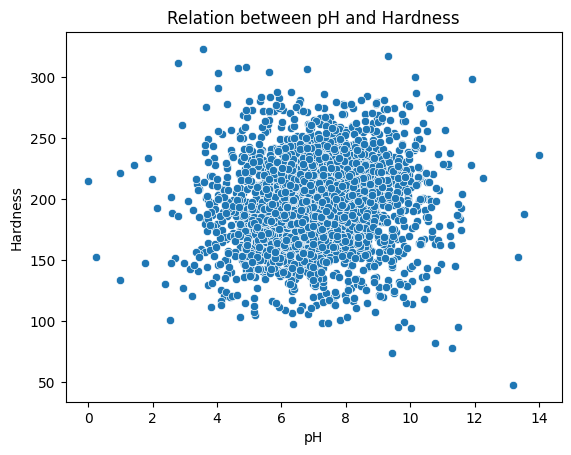

In [26]:
# Creating a scatter plot to explore the relationship between "ph" and "Hardness"
sns.scatterplot(x = "ph", y = "Hardness", data = df)
plt.xlabel("pH")
plt.ylabel("Hardness")
plt.title("Relation between pH and Hardness")
plt.show()

In [27]:
## Creating a scatter plot to explore the relationship between "ph" and "Hardness"
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.080407,-0.100376,-0.028905,0.027838,0.018312,0.035397,-0.002454,-0.032828,-0.002985
Hardness,0.080407,1.000000,-0.046899,-0.030054,-0.101367,-0.023915,0.003610,-0.014739,-0.014449,-0.013837
Solids,-0.100376,-0.046899,1.000000,-0.070148,-0.190393,0.013831,0.010242,-0.004263,0.019546,0.033743
Chloramines,-0.028905,-0.030054,-0.070148,1.000000,0.033081,-0.020486,-0.012653,0.014196,0.002363,0.023779
Sulfate,0.027838,-0.101367,-0.190393,0.033081,1.000000,-0.013865,0.027783,-0.025274,-0.012511,-0.021885
Conductivity,0.018312,-0.023915,0.013831,-0.020486,-0.013865,1.000000,0.020966,0.001856,0.005798,-0.008128
Organic_carbon,0.035397,0.003610,0.010242,-0.012653,0.027783,0.020966,1.000000,-0.012328,-0.027308,-0.030001
Trihalomethanes,-0.002454,-0.014739,-0.004263,0.014196,-0.025274,0.001856,-0.012328,1.000000,-0.024526,0.006852
Turbidity,-0.032828,-0.014449,0.019546,0.002363,-0.012511,0.005798,-0.027308,-0.024526,1.000000,0.001581
Potability,-0.002985,-0.013837,0.033743,0.023779,-0.021885,-0.008128,-0.030001,0.006852,0.001581,1.000000


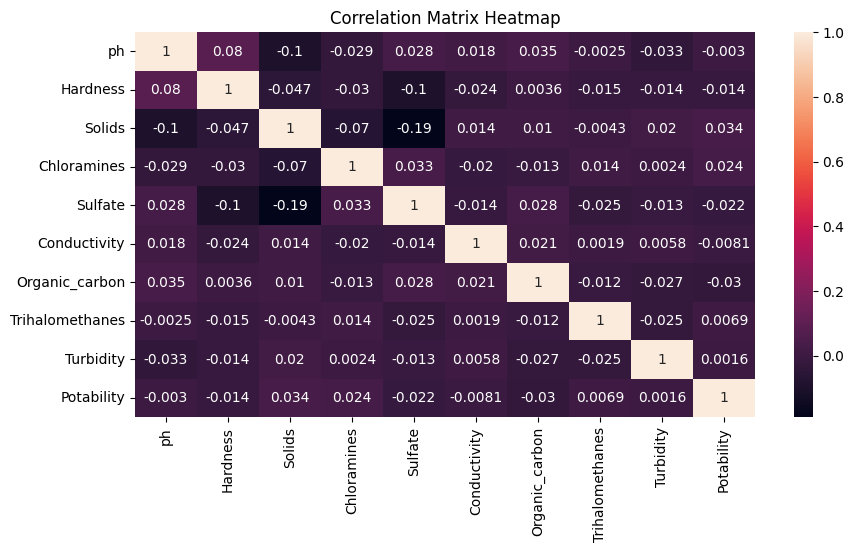

In [28]:
# Creating a heatmap to visualize the correlation matrix with annotations
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot = True)
plt.title("Correlation Matrix Heatmap")
plt.show()

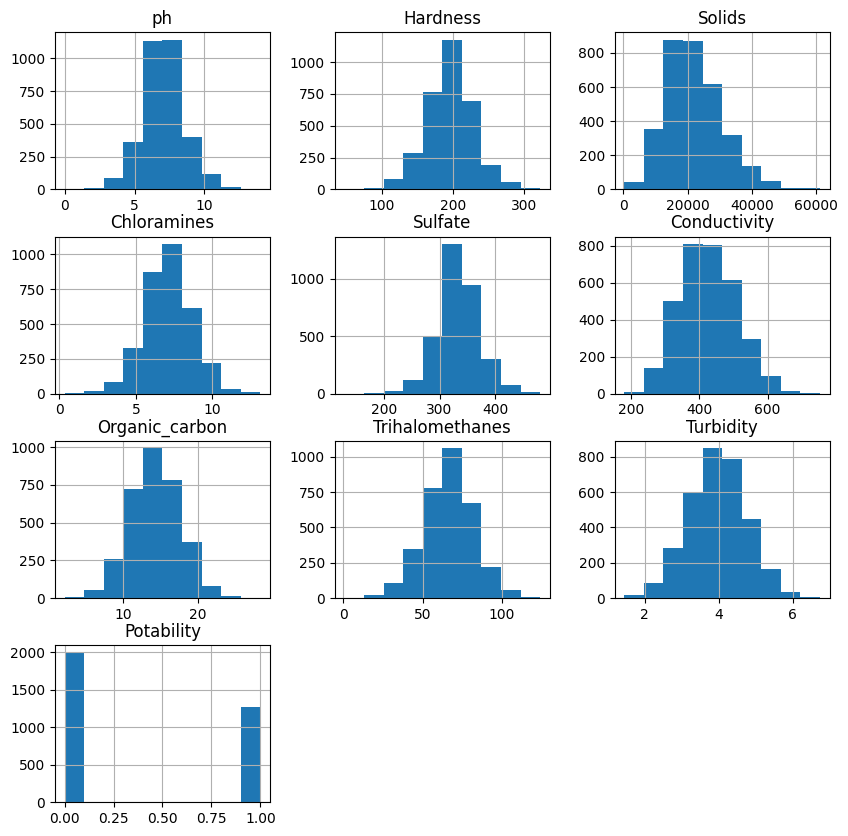

In [29]:
#Creating Histogram of each and every column
df.hist(figsize=(10,10))
plt.show()

In [30]:
X = df.iloc[:, :9] #independent variable
y = df.Potability #dependent variable

In [31]:
print("Dependent / Target Variables: ")
print(y)

Dependent / Target Variables: 
0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64


In [32]:
print("Independent Variables: ")
print(X)

Independent Variables: 
            ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.156857  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  336.094350   
2     8.099124  224.236259  19909.541732     9.275884  330.449166   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  364.091541   
3273  9.419510  175.762646  33155.578218     7.350233  327.357588   
3274  5.126763  230.603758  11983.869376     6.303357  325.952434   
3275  7.874671  195.102299  17404.177061     7.509306  345.728295   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
0       564.308654       10.379783        86.990970   2.963135  
1       592.88535

# Feature Scaling

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X)

[[ 5.26085033e-02  2.59194711e-01 -1.39470871e-01 ... -1.18065057e+00
   1.30006249e+00 -1.28629758e+00]
 [-2.24592078e+00 -2.03641367e+00 -3.85986650e-01 ...  2.70597240e-01
  -6.36279448e-01  6.84217891e-01]
 [ 6.82067797e-01  8.47664833e-01 -2.40047337e-01 ...  7.81116857e-01
   9.82483937e-04 -1.16736546e+00]
 ...
 [ 1.56412041e+00 -6.26829230e-01  1.27080989e+00 ... -9.81329234e-01
   2.17295510e-01 -8.56006782e-01]
 [-1.30354759e+00  1.04135450e+00 -1.14405809e+00 ... -9.42063817e-01
   6.99949937e-01  9.50797383e-01]
 [ 5.32127410e-01 -3.85462310e-02 -5.25811937e-01 ...  5.60940070e-01
   7.76377875e-01 -2.12445866e+00]]


# Splitting the dataset

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, stratify = y, random_state = 40)

In [35]:
print("Shape of the Feature Variable array 'X':" ,X.shape)
print("There are" ,X.shape[0], "rows and" ,X.shape[1], "columns." )

Shape of the Feature Variable array 'X': (3276, 9)
There are 3276 rows and 9 columns.


In [36]:
# Displaying the shape of the training set features (X_train)
X_train.shape

(1638, 9)

In [37]:
# Displaying the shape of the testing set features (X_test)
X_test.shape

(1638, 9)

# Model - Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

# Creating a logistic Regression model
model_reg= LogisticRegression()

# Fitting the model using the training data
model_reg.fit(X_train, y_train)

# Predicting the target variable for the test set using the trained model
y_pred_reg = model_reg.predict(X_test)

In [39]:
from sklearn.metrics import (accuracy_score,
                             f1_score,
                             precision_score,
                             recall_score)

In [40]:
Accuracy = accuracy_score(y_test, y_pred_reg)
print(f"Accuracy Score:{Accuracy}")

Accuracy Score:0.6117216117216118


In [41]:
# Calculating and displaying the f1 score using the true and predicted target variables
f1_score = f1_score(y_true = y_test, y_pred = y_pred_reg)
print(f"f1_score: {f1_score}")

# Calculating and displaying the precision score using the true and predicted target variables
precision = precision_score(y_true = y_test, y_pred = y_pred_reg)
print(f"precision_score: {precision}")

# Calculating and displaying the recall score using the true and predicted target variables
recall = recall_score(y_true = y_test, y_pred = y_pred_reg)
print(f"recall_score: {recall}")

f1_score: 0.012422360248447204
precision_score: 0.8
recall_score: 0.006259780907668232


In [42]:
from sklearn.metrics import classification_report

# Generating a classification report to obtain a comprehensive evaluation summary
classification_report(y_test, y_pred_reg)

'              precision    recall  f1-score   support\n\n           0       0.61      1.00      0.76       999\n           1       0.80      0.01      0.01       639\n\n    accuracy                           0.61      1638\n   macro avg       0.71      0.50      0.39      1638\nweighted avg       0.68      0.61      0.47      1638\n'

In [43]:
from sklearn.metrics import confusion_matrix

# Generating a confusion matrix to display true positive, false positive, true negative and false negative counts
confusion_matrix(y_test, y_pred_reg)

array([[998,   1],
       [635,   4]])

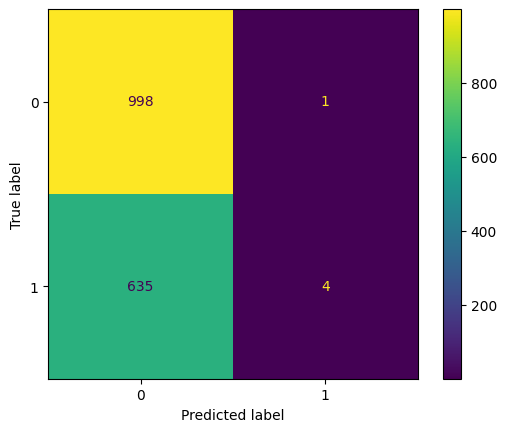

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_reg, labels=model_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_reg.classes_)
disp.plot()

plt.show()